In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# Load data
work_dir = os.getcwd() # CHANGE THIS WITH YOUR CURRENT DIR!
save_path = work_dir + r'\ex01_data.npy'

data = np.load('ex01_data.npy') # TODO: load data (check https://numpy.org/doc/stable/reference/generated/numpy.load.html)
    
x1 = data[:,0]
x2 = data[:,1]
y = data[:,2]


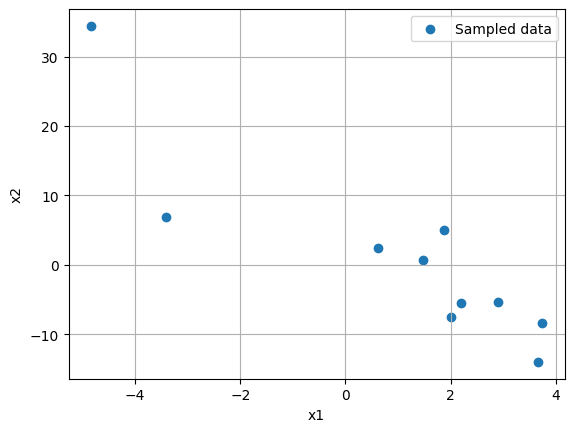

In [6]:
# Sample data and plot
np.random.seed(100)

sample_points = 10 # number of sample points
sample_idx = np.sort(np.random.choice(len(x1), sample_points))

x1_sub = np.take(x1, sample_idx)
x2_sub = np.take(x2, sample_idx) # TODO: sample x2

plt.figure()
plt.scatter(x1_sub, x2_sub, label='Sampled data')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.show()

In [7]:
def polyfit(x1, x2, deg, regularization=0, y = None, show_sums_of_squares=False):
    
    # Generate polynomial features
    poly = PolynomialFeatures(degree=deg)
    x1_poly = poly.fit_transform(x1[:, np.newaxis])
    
    # Create the Ridge regression model
    ridge_reg = Ridge(alpha=regularization)
    

    # Fit the model
    ridge_reg.fit(x1_poly, x2) # TODO: check https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html for further information
    
    # Generate x values for the regression line/curve
    x = np.linspace(min(x1), max(x1), 1000) # TODO: Generate 1000 samples between the minimum and maximum values of x1
    X_poly = poly.transform(x[:, np.newaxis])
    
    # Predict y_hat values
    y_hat = ridge_reg.predict(X_poly) # Use the ridge regression to predict x2 given x1
    
    # Extract coefficients
    coefs = ridge_reg.intercept_, *ridge_reg.coef_[1:]
    
    # Here we calculate mean-square-error (MSE)
    MSE = np.square(np.subtract(ridge_reg.predict(x1_poly), x2)).mean() # TODO: implement MSE equation

    # At last we plot the observation and the regression line/curve
    plt.figure()
    
    # The following 2 lines is only to show the "squares" to be minimized
    if show_sums_of_squares:
        plt.plot((x1, x1), (x2, ridge_reg.predict(x1_poly)), 
                 color='limegreen')
    
    plt.scatter(x1, x2, label='Observations')
    plt.plot(x, y_hat, '-', label='Polynimial fit of degree %i' % deg, color='orange')
    if y is not None:
        plt.plot(np.linspace(-5,5,500), y, label='Ground truth', color='red')
    
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.ylim([-20, 40])
    plt.legend()
    plt.grid()
    plt.show()
    
    return coefs, MSE


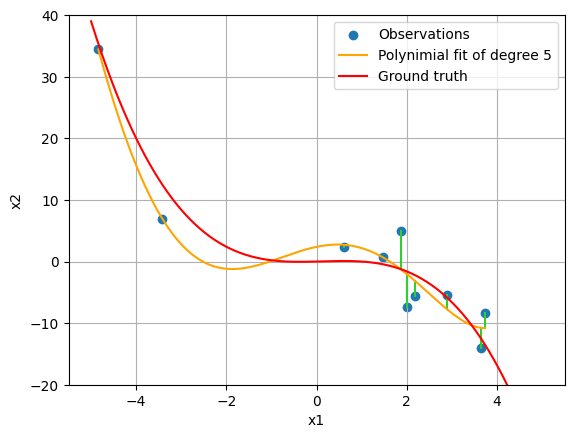

MSE =  9.578


In [8]:
# 1) Experiment with different polynomial degrees:
deg = 5

coefs, mse = polyfit(x1_sub, x2_sub, deg=deg, y=y, show_sums_of_squares=True)
print('MSE = ', round(mse,3))

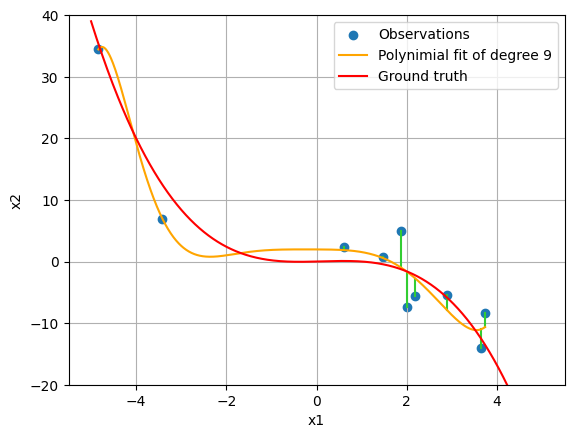

MSE =  9.764


In [9]:
# 2) Explore L2 regularization:
deg = 9
reg = 30

coefs, mse = polyfit(x1_sub, x2_sub, deg=deg, regularization=reg , y=y, show_sums_of_squares=True) # TODO
print('MSE = ', round(mse,3))

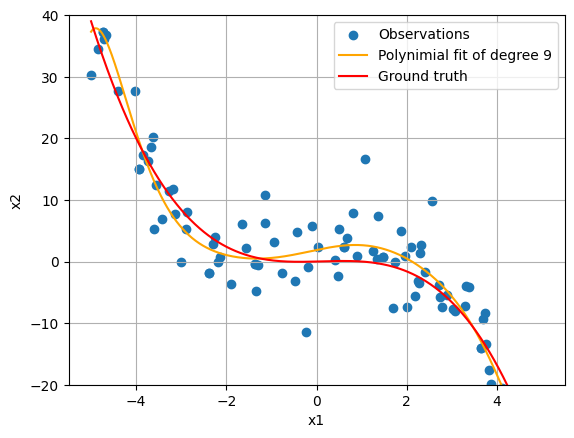

MSE =  18.709


In [10]:
# 3) Investigate the effect of sample size.
np.random.seed(100)

sample_points = 100

sample_idx = np.sort(np.random.choice(len(x1), sample_points)) # TODO

x1_sub_100 = np.take(x1, sample_idx)
x2_sub_100 = np.take(x2, sample_idx) # TODO: sample x2

deg = 9
reg = 1e-2
coefs, mse = polyfit(x1_sub_100, x2_sub_100, deg=deg, regularization=reg, y=y)
print('MSE = ', round(mse,3))